# BAB PENGENALAN

   ##### Nama  : Farand Austen Mahesa
   ##### Kelas : Full Bootcamp Data Science

Tujuan Program
>Pada program ini akan dilakukan Random Forest dan Boosting untuk memprediksi penyakit apa yang mempengaruhi angka kematian pada Model Inference yang akan dibuat


Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Data Preprocessing
   - Pendefinisian Model
   - Pelatihan Model
   - Evaluasi Model
   - Model Inference
   - Pengambilan Kesimpulan

# IMPORT DATA PUSTAKA YANG DIBUTUHKAN

In [130]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# PREPROCESSING

In [131]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [132]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [133]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [135]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [136]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

#### EDA

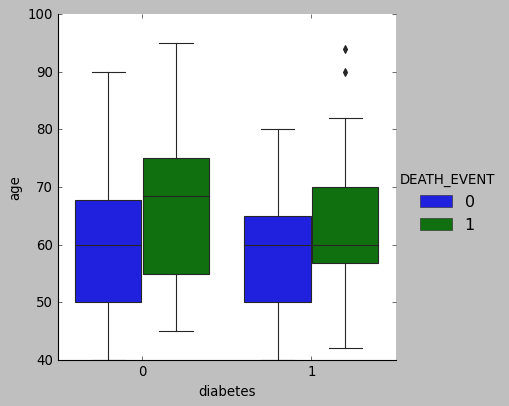

In [137]:
#Diabetes
sns.catplot(x='diabetes', y="age", hue = 'DEATH_EVENT', kind="box", data=df)

Orang yang diabetes memiliki angka kematian yang sedikit dibandingkan dengan orang yang tidak memiliki diabetes

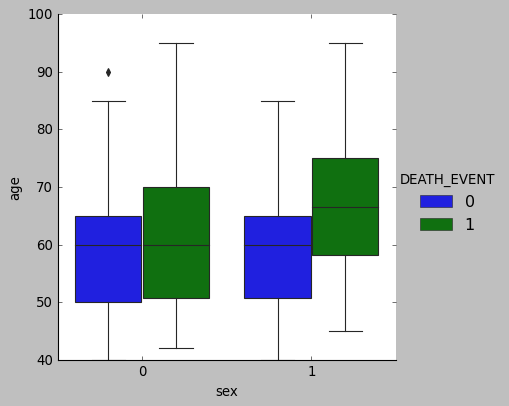

In [138]:
#Jenis Kelamin
sns.catplot(x='sex', y="age", hue = 'DEATH_EVENT', kind="box", data=df)

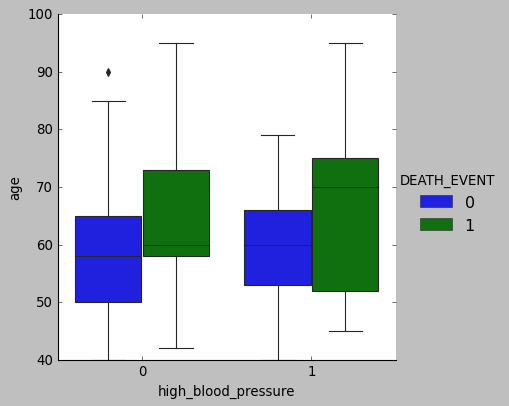

In [139]:
#Tekanan Darah Tinggi
sns.catplot(x='high_blood_pressure', y="age", hue = 'DEATH_EVENT', kind="box", data=df)

Orang yang mempunyai tekanan darah tinggi memiliki angka kematian yang lebih besar dibandingkan dengan yang tidak memiliki tekanan darah tinggi.

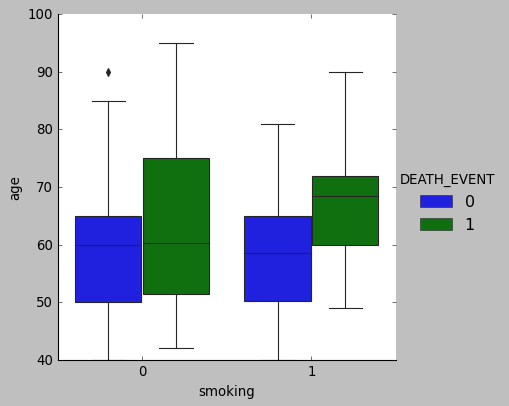

In [140]:
#Smoking
sns.catplot(x='smoking', y="age", hue = 'DEATH_EVENT', kind="box", data=df)

<AxesSubplot:>

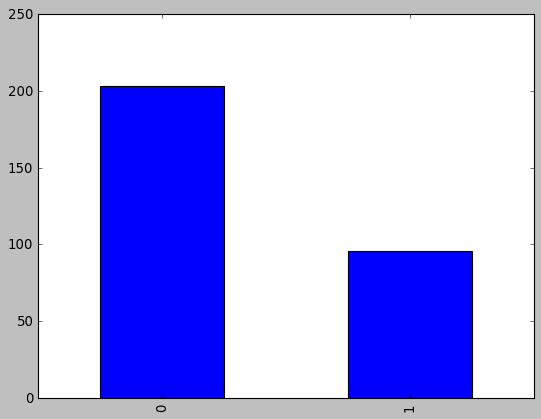

In [141]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

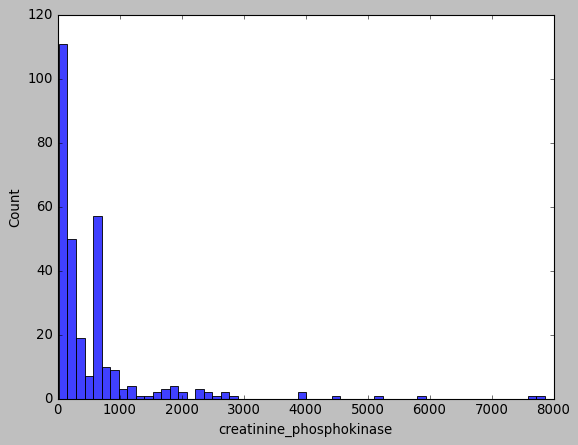

In [142]:
sns.histplot(df["creatinine_phosphokinase"])

In [143]:
def histogram_attribute():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.histplot(x=u, data=df, hue='DEATH_EVENT', ax=ax, bins=10, kde=True)
        ax.set_title(f'Histogram: {u}.')
    plt.show()
    

    
def barplot_attribute():
    fig= plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    cols = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']
    
    for i, u in enumerate(cols):
        ax = fig.add_subplot(3,3, i+1)
        sns.barplot(y=u, data=df, x='DEATH_EVENT', ax=ax)
        ax.set_title(f'Barplot: {u}.')
    plt.show()

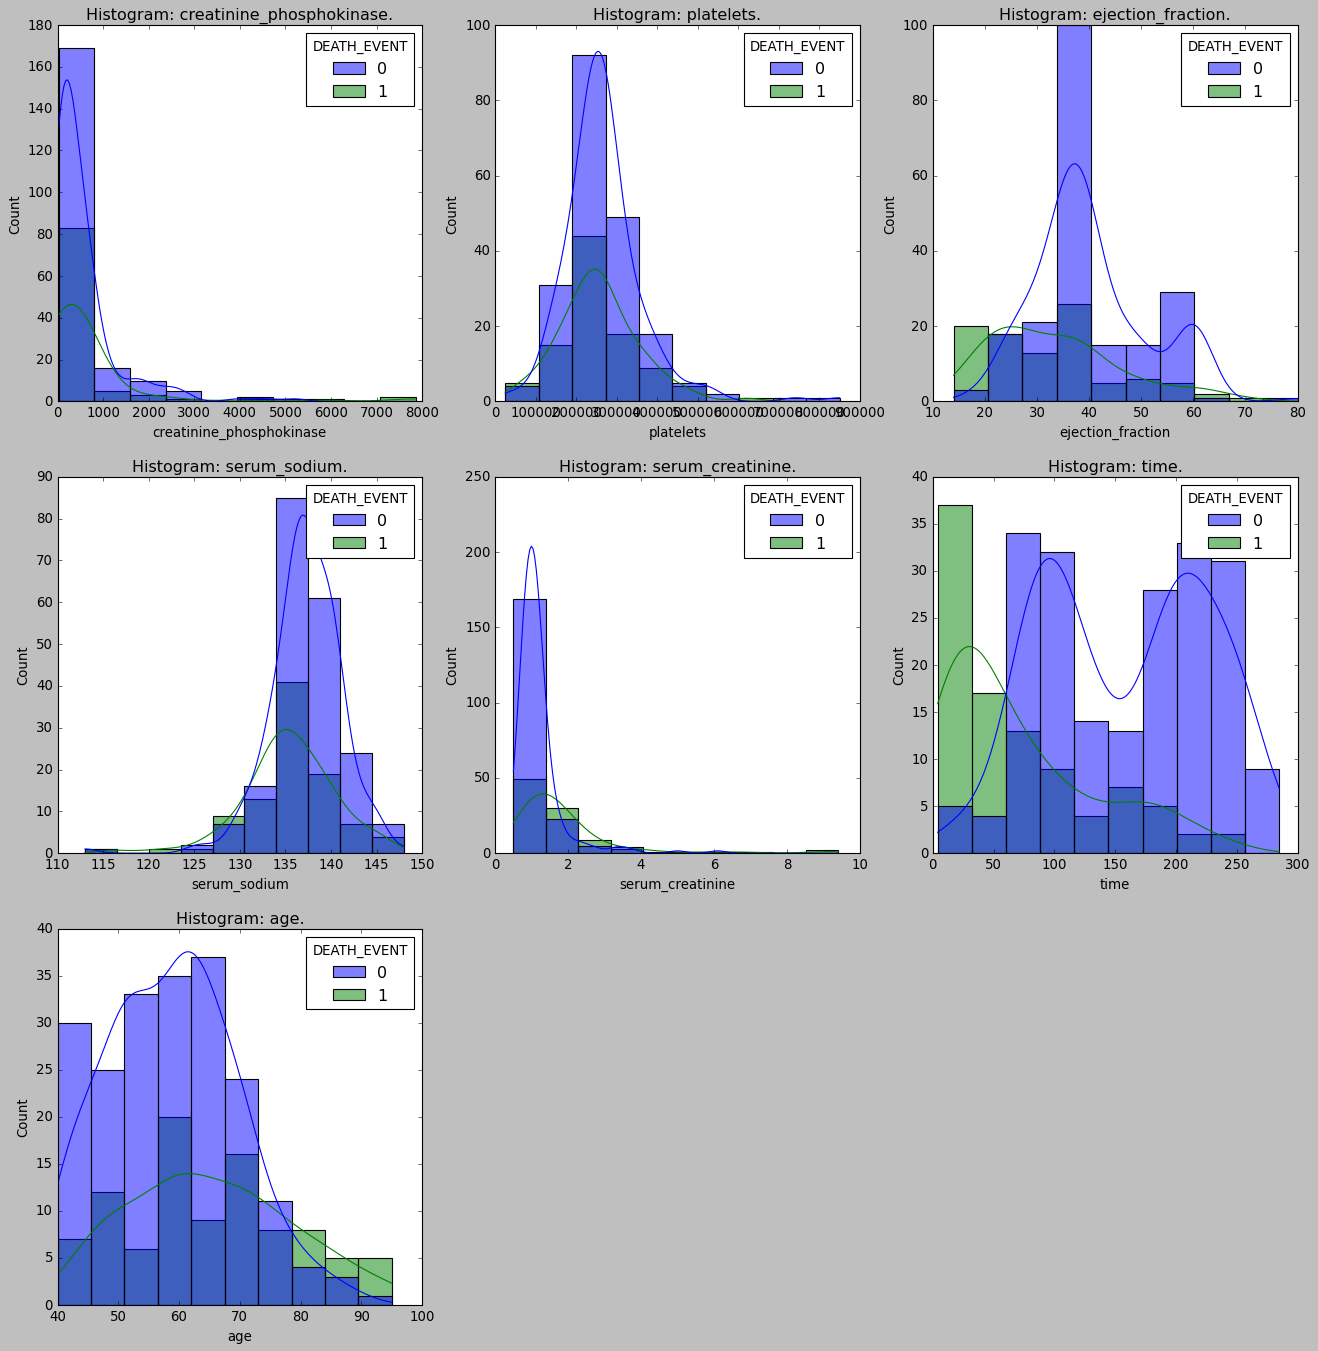

In [145]:
histogram_attribute()

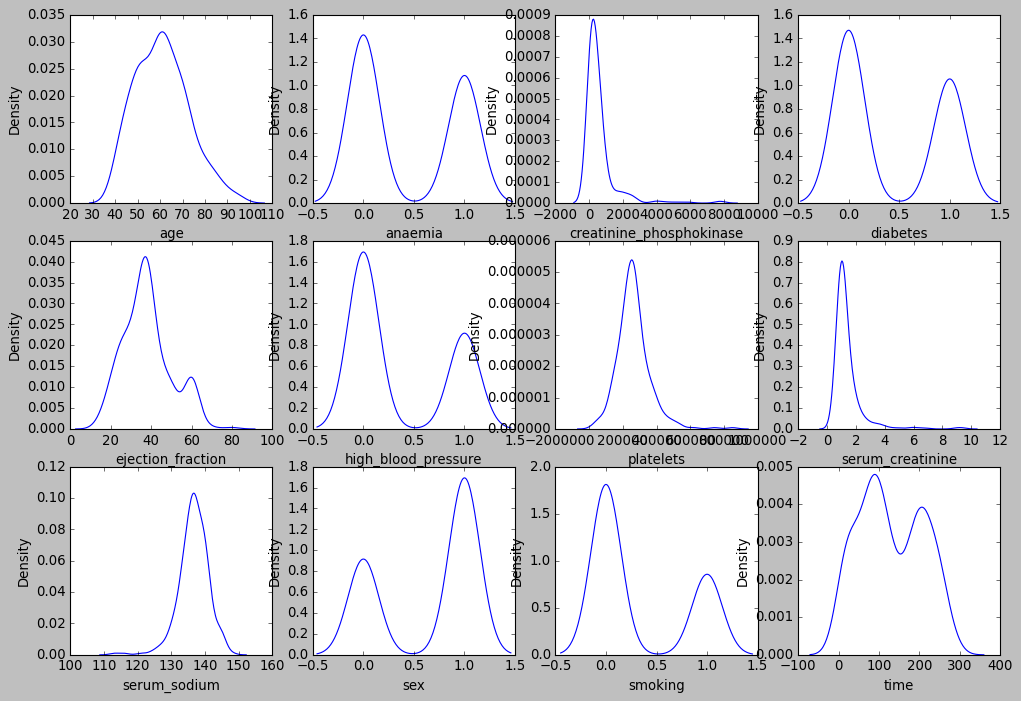

In [146]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,4,figsize = (15,10))
ax = ax.flatten()
for i in range (0,df.shape[1]-1):
    sns.kdeplot(df.iloc[:,i],ax = ax[i])

<AxesSubplot:>

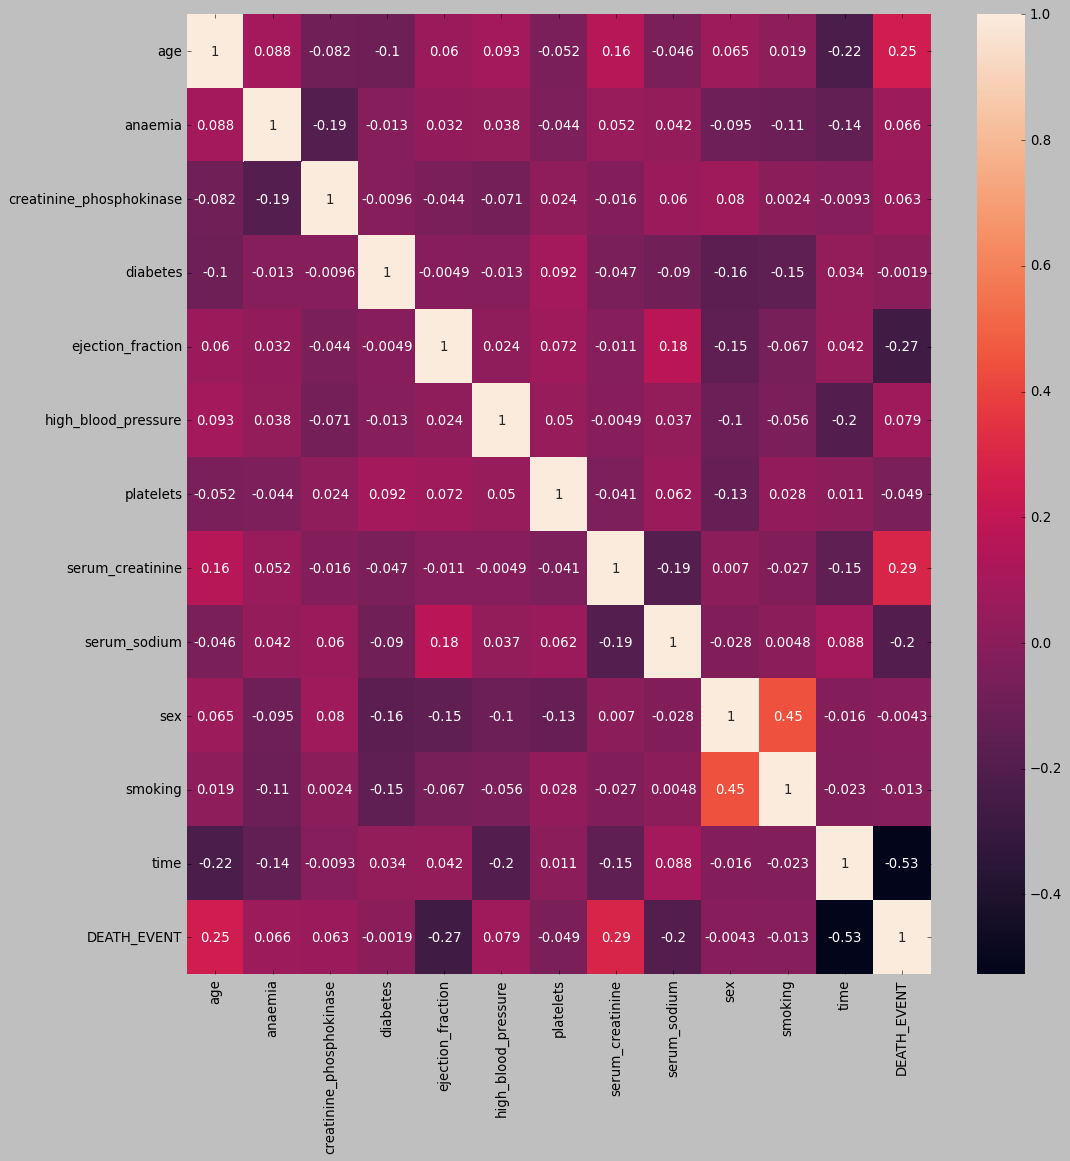

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

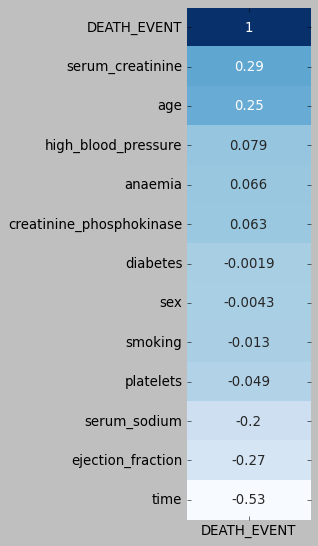

In [148]:
corr_mat = df.corr()['DEATH_EVENT'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr_mat, cmap='Blues', cbar=False, annot=True)
plt.show()

In [149]:
X = df.drop(['DEATH_EVENT'],axis = 1)
y = df['DEATH_EVENT']

In [150]:
X_inch = sm.add_constant(X)
model = sm.OLS(y, X_inch)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,1.663556e+00,0.017
age,5.766578e-03,0.002
anaemia,-2.765880e-03,0.950
creatinine_phosphokinase,3.426613e-05,0.128
diabetes,1.927520e-02,0.662
ejection_fraction,-9.833650e-03,0.000
high_blood_pressure,-1.429674e-02,0.754
platelets,-8.370305e-08,0.705
serum_creatinine,8.526866e-02,0.000
serum_sodium,-7.599145e-03,0.131


In [151]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.35e-27
Time:                        14:52:14   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6636      0.695      2.392      0.017       0.295       3.032
age                          0.0058      0.002      3.088      0.002       0.002       0.009
anaemia                     -0.0028      0.044     -0.062      0.950      -0.090       0.085
creatinine_phosphokinase  3.427e-05   2.25e-05      1.525      0.128   -9.96e-06    7.85e-05
diabetes                     0.0193      0.044      0.437      0.662      -0.068       0.106
ejection_fraction           -0.0098      0.002     -5.333      0.000      -0.013      -0.006
high_blood_pressure         -0.0143      0.046     -0.313      0.754      -0.104       0.076
platelets                 -8.37e-08   2.21e-07     -0.379      0.705   -5.18e-07    3.51e-07
serum_creatinine             0.0853      0.021      4.017      0.000       0.043       0.127
serum_sodium                -0.0076      0.005     -1.513      0.131      -0.017       0.002
sex                         -0.0637      0.051     -1.247      0.214      -0.164       0.037
smoking                     -0.0057      0.051     -0.112      0.911      -0.106       0.095
time                        -0.0027      0.000     -9.415      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.068   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.014
Skew:                           0.306   Prob(JB):                       0.0182
Kurtosis:                       2.483   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# PEMODELAN DATA

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [153]:
X_train.shape

(209, 12)

In [154]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"1. CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}\n")
    print(f"2. ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred) * 100:.2f} %\n")
    print(f"3. CLASSIFICATION REPORT:\n{clf_report}")
    print("\n\n")
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"1. CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}\n")
    print(f"2. ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred) * 100:.2f} %\n")
    print(f"3. CLASSIFICATION REPORT:\n{clf_report}")

# RANDOM FOREST

In [156]:
rf_model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=15, bootstrap=False, max_samples=100, n_jobs=-1, random_state=69)

rf_model.fit(X_train, y_train)
rf_y_pred1 = rf_model.predict(X_train)
rf_y_pred2 = rf_model.predict(X_test)

In [157]:
evaluate(rf_model, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[137   4]
 [  8  60]]

2. ACCURACY SCORE:
94.26 %

3. CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.944828   0.937500  0.942584    0.941164      0.942443
recall       0.971631   0.882353  0.942584    0.926992      0.942584
f1-score     0.958042   0.909091  0.942584    0.933566      0.942115
support    141.000000  68.000000  0.942584  209.000000    209.000000



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[59  3]
 [10 18]]

2. ACCURACY SCORE:
85.56 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.855072   0.857143  0.855556   0.856108      0.855717
recall      0.951613   0.642857  0.855556   0.797235      0.855556
f1-score    0.900763   0.734694  0.855556   0.817729      0.849097
support    62.000000  28.000000  0.855556  90.000000     90.000000


In [158]:
scores = {
    'Random Forest': {
        'Train': accuracy_score(y_train, rf_model.predict(X_train)),
        'Test': accuracy_score(y_test, rf_model.predict(X_test)),
    },
}

In [159]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_model.predict(X_train)),
        'Test': accuracy_score(y_test, rf_model.predict(X_test)),
}

# 1. BAGGING CLASSIFIER

In [100]:
bag_clf = BaggingClassifier(rf_model, n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
evaluate(bag_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[138   3]
 [  9  59]]

2. ACCURACY SCORE:
94.26 %

3. CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938776   0.951613  0.942584    0.945194      0.942952
recall       0.978723   0.867647  0.942584    0.923185      0.942584
f1-score     0.958333   0.907692  0.942584    0.933013      0.941857
support    141.000000  68.000000  0.942584  209.000000    209.000000



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[59  3]
 [11 17]]

2. ACCURACY SCORE:
84.44 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.842857   0.850000  0.844444   0.846429      0.845079
recall      0.951613   0.607143  0.844444   0.779378      0.844444
f1-score    0.893939   0.708333  0.844444   0.801136      0.836195
support    62.000000  28.000000  0.844444  90.000000     90.000000


In [101]:
scores['Bagging Classifier']= {
        'Train': accuracy_score(y_train, bag_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bag_clf.predict(X_test)),
}

# 2. ADA BOOST CLASSIFIER

In [102]:
rf_adaboost_model = AdaBoostClassifier(rf_model, n_estimators=100, learning_rate=0.1, algorithm='SAMME.R', random_state=0)
rf_adaboost_model.fit(X_train, y_train)
evaluate(rf_adaboost_model, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[139   2]
 [  3  65]]

2. ACCURACY SCORE:
97.61 %

3. CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.978873   0.970149  0.976077    0.974511      0.976035
recall       0.985816   0.955882  0.976077    0.970849      0.976077
f1-score     0.982332   0.962963  0.976077    0.972648      0.976030
support    141.000000  68.000000  0.976077  209.000000    209.000000



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[58  4]
 [10 18]]

2. ACCURACY SCORE:
84.44 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.852941   0.818182  0.844444   0.835561      0.842127
recall      0.935484   0.642857  0.844444   0.789171      0.844444
f1-score    0.892308   0.720000  0.844444   0.806154      0.838701
support    62.000000  28.000000  0.844444  90.000000     90.000000


In [103]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, rf_adaboost_model.predict(X_train)),
        'Test': accuracy_score(y_test, rf_adaboost_model.predict(X_test)),
    }

# 3. GRADIENT BOOSTING CLASSIFIER

In [104]:
g_boosting_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0, max_depth=5)
g_boosting_model.fit(X_train, y_train)
evaluate(g_boosting_model, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[141   0]
 [  0  68]]

2. ACCURACY SCORE:
100.00 %

3. CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    141.0  68.0       1.0      209.0         209.0



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[58  4]
 [13 15]]

2. ACCURACY SCORE:
81.11 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.816901   0.789474  0.811111   0.803188      0.808368
recall      0.935484   0.535714  0.811111   0.735599      0.811111
f1-score    0.872180   0.638298  0.811111   0.755239      0.799417
support    62.000000  28.000000  0.811111  90.000000     90.000000


In [105]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, g_boosting_model.predict(X_train)),
        'Test': accuracy_score(y_test, g_boosting_model.predict(X_test)),
    }

# 4. EARLY STOPPING

In [106]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)
evaluate(gbrt_best, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[141   0]
 [  2  66]]

2. ACCURACY SCORE:
99.04 %

3. CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.986014   1.000000  0.990431    0.993007      0.990564
recall       1.000000   0.970588  0.990431    0.985294      0.990431
f1-score     0.992958   0.985075  0.990431    0.989016      0.990393
support    141.000000  68.000000  0.990431  209.000000    209.000000



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[59  3]
 [10 18]]

2. ACCURACY SCORE:
85.56 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.855072   0.857143  0.855556   0.856108      0.855717
recall      0.951613   0.642857  0.855556   0.797235      0.855556
f1-score    0.900763   0.734694  0.855556   0.817729      0.849097
support    62.000000  28.000000  0.855556  90.000000     90.000000


In [107]:
scores['Early Stopping'] = {
        'Train': accuracy_score(y_train, gbrt_best.predict(X_train)),
        'Test': accuracy_score(y_test, gbrt_best.predict(X_test)),
    }

# 5. XGBOOST

In [108]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING RESULTS: 
1. CONFUSION MATRIX:
[[141   0]
 [  0  68]]

2. ACCURACY SCORE:
100.00 %

3. CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    141.0  68.0       1.0      209.0         209.0



TESTING RESULTS: 
1. CONFUSION MATRIX:
[[59  3]
 [11 17]]

2. ACCURACY SCORE:
84.44 %

3. CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.842857   0.850000  0.844444   0.846429      0.845079
recall      0.951613   0.607143  0.844444   0.779378      0.844444
f1-score    0.893939  

In [109]:
scores['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

In [110]:
#Hasilnya benar
new_data1 = np.array([75, 0, 582, 0, 20, 1, 265000.00, 1.9, 130, 1, 0, 4]).reshape(1, -1)
print("Death =", xgb_clf.predict(scaler.transform(new_data1)))

Death = [1]


In [111]:
#Haslnya benar
new_data1 = np.array([75, 0, 582, 0, 20, 1, 265000.00, 1.9, 130, 1, 0, 4]).reshape(1, -1)
print("Death =", xgb_clf.predict(scaler.transform(new_data1)))

Death = [1]


#### DATA TRAINING MODEL INFERENCE XGBOOST

In [112]:
pred_result5 = []

model_pred = xgb_clf.predict(X_train)
pred_result5.append(model_pred)

pred_result_rf = pd.DataFrame({
    "Actual Target": y_train,
    "Prediction with XGBoost": pred_result5[0] 
})

pred_result_rf

,Actual Target,Prediction with XGBoost
59,1,1
173,0,0
187,1,1
70,0,0
138,0,0
...,...,...
49,1,1
90,0,0
107,0,0
203,0,0


#### DATA TESTING MODEL INFERENCE XGBOOST

In [113]:
pred_result6 = []

model_pred = xgb_clf.predict(X_test)
pred_result6.append(model_pred)

pred_result_rf = pd.DataFrame({
    "Actual Target": y_test,
    "Prediction with XGBoost": pred_result6[0] 
})

pred_result_rf

,Actual Target,Prediction with XGBoost
186,1,0
25,1,1
15,1,1
228,0,0
216,0,0
...,...,...
139,0,0
76,0,0
84,1,0
180,0,0


In [114]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)     

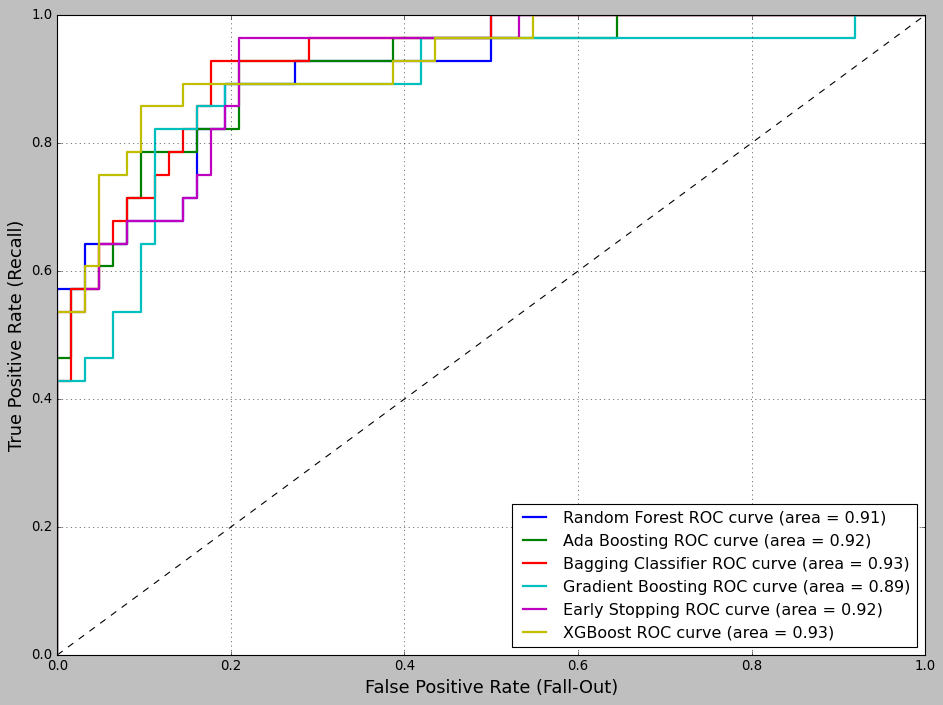

In [126]:
plt.figure(figsize=(14, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['Random Forest','Ada Boosting', 'Bagging Classifier', 'Gradient Boosting','Early Stopping','XGBoost']
for idx,model in enumerate([rf_model, rf_adaboost_model, bag_clf, g_boosting_model, gbrt_best, xgb_clf]):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

# MODEL INFERENCE

In [73]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### XGBoost

In [140]:
#Hasilnya Benar
new_data1 = np.array([75.0, 0, 2413, 0, 100, 0, 742000, 1.6, 136, 0, 0, 270]).reshape(1, -1)
print("Death =", rf_model.predict(scaler.transform(new_data1)))

Death = [0]


In [91]:
#Hasilnya Benar
new_data1 = np.array([55, 0, 7861, 0, 38, 0, 263358.03, 1.1, 136, 1, 0, 6]).reshape(1, -1)
print("Death =", rf_model.predict(scaler.transform(new_data1)))

Death = [1]


In [127]:
new_data1 = np.array([62.0, 0, 61, 0, 38, 0, 155000.00, 1.1, 143, 0, 0, 270]).reshape(1, -1)
print("Death =", rf_model.predict(scaler.transform(new_data1)))

Death = [0]


# OVERALL ANALYSIS

#### EDA ANALYSIS
1. Orang yang diabetes memiliki angka kematian yang besar dibandingkan dengan orang yang tidak memiliki diabetes
2. Orang yang mempunyai tekanan darah tinggi tidak mempengaruhi angka kematian
3. Angka kematian lebih sedikit dibandingkan angka kehidupan
4. Rentan umur yang diperiksa rata-rata diumur 60 tahun
5. Orang yang merokok tidak mempengaruhi angka kematian
6. Setelah dilakukan beberapa uji statistik, ternyata yang mempengaruhi kematian adalah usianya, ejection fraction (total darah yang keluar setiap detak jantung), dan time tetapi itu tidak bisa menjad runutan dikarenakan datanya terlalu sedikit. 
5. Pada kolom time, jika timenya semakin banyak maka angka kematian juga semakin besar
6. Orang merokok yang meninggal di sekitar umur 50 - 90 tahun, tetapi rata-rata kebanyakan di umur 65 tahun
7. Kolom creatinine_phosphokinase memiliki distribusi skew kanan positif hingga terdapat outliers pada angka 800 dan ternyata di angka tersebut orang tersebut meninggal
8. Kolom numerik yang continous diantaranya age, ptetatelets wjwction fraction, creatinine phosphokinase, serum sodium, serum creatine dan time.

#### MODEL ANALYSIS
Pada bagian ini akan dijelaskan dulu beberapa tahap sebelum pemodelan pada data
1. Pada model analisis ini akan dites seberapa akurasinya prediksi model random forest dibandingkan dengan boosting yang lain dalam hal akurasi
2. Data yang dberikan sudah terlalu sedikit sehingga tidak akan dilakukan resampling
3. Data langsung dimasukkan kedalam testing untuk diketahui apakah data tersebut overfit atau underfit
4. Tidak dilakukan beberapa uji korelasi dan homogenitas untuk pembuangan beberapa kolom untuk melihat seberapa akurasinya jika data tersebut overfit atau underfit
5. Lalu akan dites dengan model random forest dan beberapa boosting lainnya

<AxesSubplot:>

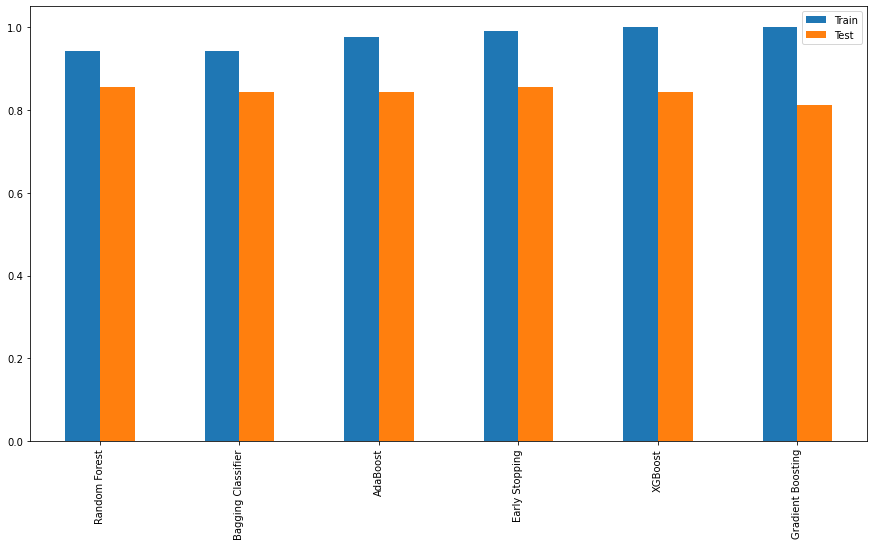

In [69]:
scores_df = pd.DataFrame(scores)

scores_df.T.plot(kind='bar', figsize=(15, 8))

<AxesSubplot:>

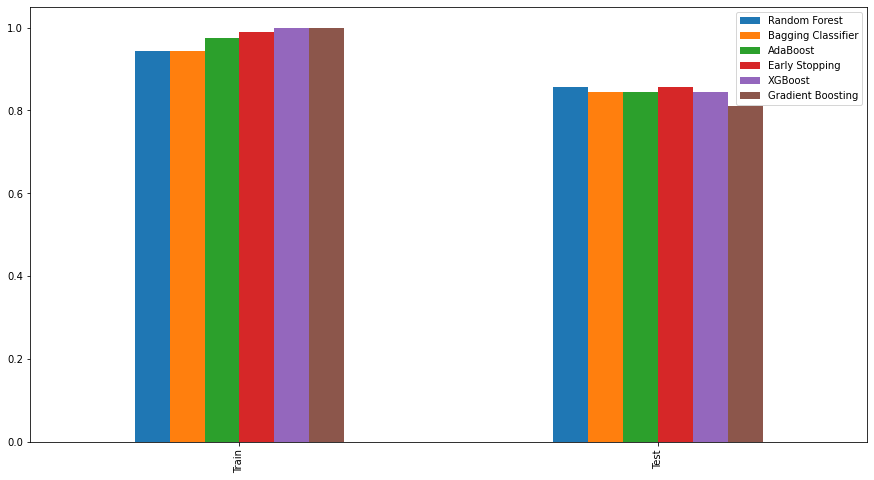

In [70]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='bar', figsize=(15, 8))

Dari data didapat kita bisa melihat seberapa akurasinya data training dan data testing yang sudah dilakukan dimana algoritma yang akan dipakai adalah model Random forest, bagging classifier, ada boost, early stopping, xgboost, dan gradien boosting. Dan didapat hasilnya bahwa
1. Gradient boosting dan XGboost pada data training mendapatkan akurasi tertinggi tetapi jika datanya sedikit atau pada data testing, Gradien boosting ini langsung menuju ke terendah dan tidak konsisten.
2. Random forest merupakan model yang mendapatkan akurasi terendah pada data training sama halnya dengan bagging classifier. Tetapi jika datanya rendah maka model random forest ini akurasinya tidak terlalu jauh dengan data training. Oleh karena itu algoritma random forest ini sering juga digunakan oleh ilmuwan data dikarenakan akurasi, precision, dan recall model ini sangat stabil
3. XGBoost mendapatkan akurasi tertinggi 100% sama halnya gradient boosting dan akurasi yang dilakukan pada data testing tidak terlau jauh dengan data trainingnya. Ini alasan jika XGboost selalu digunakan oleh ilmuwan data dikarenakan kestabilan akurasinya.
4. Pada pemodelan data akan terlihat bahwa data yang diberikan ternyata overfit, yang artinya terdapat data yang tidak diperlukan untuk memprediksi kematian
5. Bagging Classifier dan Ada boost dicoba pada algoritma random forest, hasilnya bagging classifer tidak membuat akurasi random forest naik malah membuat akurasi semakin menurun pada data testingnya, sedangkan ada boost meningkatkan tingkat akurasi dari random forest